# Berlin Rental Market Analysis
#### Data exploration and analysis

This project explores the market of rental properties in Berlin based on historical data of listings collected in 2018–2019 from Immoscout24, Germany’s largest real estate platform, and published on Kaggle by user CorrieBar. The data is used here for non-commercial, educational purposes only, as no explicit license is provided. All rights to the original data remain with the respective owners. As mentioned in the acknowledgements, “The data belongs to www.immobilienscout24.de and is for research purposes only.”

The main goal of this project is to understand how various factors influence rent prices across Berlin. Gaining these insights can help renters make informed decisions, support landlords in setting competitive prices, and offer useful benchmarks for analysts and policymakers monitoring housing trends in urban areas.

The project is structured in three parts:

**Part 1 – Data exploration and analysis** (this notebook)

I start by preparing the dataset: cleaning, reshaping, and handling outliers. Then, I take a closer look at both numerical and categorical features, and investigate how they relate to the total rent.

**Part 2 – Predictive modeling**

In the second stage, I will build machine learning models that predict rent prices based on selected features.

**Part 3 – Presentation with Tableau dashboards**

The findings from the EDA and ML will be summarized and visualized using Tableau, to make the insights easier to present and explore.

In [3]:
pip install folium geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install geopandas


In [5]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

%matplotlib inline
sns.set(style="whitegrid")

## 1. Data Loading and Initial Exploration

After importing the libraries, I read the dataset and conducted the initial exploration to familiarize myselfwith the data.

Objectives:
- Visually explore the dataset
- Learn its shape, data types, and basic statistics
- Identify potentially valuable features


In [9]:
# Read the file and show the dataframe

df = pd.read_csv('/Users/alex/Documents/Work/Projects for portfolio/immo_data.csv')
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [12]:
# List the columns

df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

## 2.  Data Cleaning

As my key interest for this research is focused on Berlin, in this section, I limit the data accordingly and also select the features that will be more valuable for the analysis. As the data has different data types and there are many missing values, before continuing I will handle this.

Objectives:
- Limit the data to listings in Berlin
- Filter out unnecessary features
- Handle missing values

In [16]:
# Check the regions

df['regio1'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

In [17]:
# Filter to the city of Berlin

df_berlin = df[df['regio1'] == 'Berlin'].copy()

In [18]:
# Exploring regio3 feature

df_berlin['regio3'].unique()

array(['Staaken_Spandau', 'Weißensee_Weißensee', 'Mitte_Mitte',
       'Kreuzberg_Kreuzberg', 'Tiergarten_Tiergarten', 'Grünau_Köpenick',
       'Marzahn_Marzahn', 'Köpenick_Köpenick',
       'Neu_Hohenschönhausen_Hohenschönhausen', 'Hellersdorf_Hellersdorf',
       'Prenzlauer_Berg_Prenzlauer_Berg', 'Französisch_Buchholz_Pankow',
       'Charlottenburg_Charlottenburg', 'Mariendorf_Tempelhof',
       'Neukölln_Neukölln', 'Schmargendorf_Wilmersdorf',
       'Wedding_Wedding', 'Siemensstadt_Spandau', 'Britz_Neukölln',
       'Buch_Pankow', 'Friedrichshain_Friedrichshain', 'Karow_Weißensee',
       'Wilmersdorf_Wilmersdorf', 'Reinickendorf_Reinickendorf',
       'Schmöckwitz_Köpenick', 'Wittenau_Reinickendorf',
       'Spandau_Spandau', 'Adlershof_Treptow', 'Friedenau_Schöneberg',
       'Alt_Hohenschönhausen_Hohenschönhausen', 'Schöneberg_Schöneberg',
       'Friedrichsfelde_Lichtenberg', 'Karlshorst_Lichtenberg',
       'Oberschöneweide_Köpenick', 'Pankow_Pankow',
       'Johannisthal_T

In [19]:
# Filter non-significant features out

df_berlin_s=df_berlin[['totalRent', 'livingSpace', 'noRooms', 'yearConstructed', 'heatingType',
    'condition', 'interiorQual', 'typeOfFlat', 'balcony', 'cellar', 'lift',
    'garden', 'hasKitchen', 'newlyConst', 'floor', 'numberOfFloors', 'regio3']].copy()
df_berlin_s.head()

,totalRent,livingSpace,noRooms,yearConstructed,heatingType,condition,interiorQual,typeOfFlat,balcony,cellar,lift,garden,hasKitchen,newlyConst,floor,numberOfFloors,regio3
45,1140.00,77.00,3.0,NaN,central_heating,NaN,NaN,ground_floor,True,False,True,False,True,False,0.0,3.0,Staaken_Spandau
61,955.00,62.63,2.0,1918.0,central_heating,refurbished,NaN,ground_floor,False,False,False,False,False,False,0.0,3.0,Weißensee_Weißensee
77,1300.00,46.40,2.0,2019.0,floor_heating,first_time_use,luxury,apartment,True,True,True,False,True,True,3.0,5.0,Mitte_Mitte
86,1428.78,67.00,2.5,2017.0,floor_heating,mint_condition,sophisticated,apartment,True,True,True,False,True,False,6.0,7.0,Kreuzberg_Kreuzberg
87,1559.05,73.54,2.0,2019.0,district_heating,first_time_use,sophisticated,ground_floor,True,True,True,False,True,True,0.0,6.0,Tiergarten_Tiergarten


As I came up with the selection of features that I will use further in my analysis, now my task is to make sure that the dataset is consistent and all the columns contain enough meaningful information.

In [21]:
# Check missing values for each column
df_berlin_s.isnull().sum()

totalRent           662
livingSpace           0
noRooms               0
yearConstructed    1425
heatingType        1471
condition          2268
interiorQual       4208
typeOfFlat          804
balcony               0
cellar                0
lift                  0
garden                0
hasKitchen            0
newlyConst            0
floor              1100
numberOfFloors     3127
regio3                0
dtype: int64

_totalRent_ is a target variable for this project. I need to simultaneously keep the original values intact and not allow missing values to affect the future analysis and predictions. So, I drop the missing values.

In [23]:
# Drop NA values for the target variable

df_berlin_s = df_berlin_s.dropna(subset=['totalRent'])

# Check the number of values and data types
df_berlin_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9744 entries, 45 to 268829
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   totalRent        9744 non-null   float64
 1   livingSpace      9744 non-null   float64
 2   noRooms          9744 non-null   float64
 3   yearConstructed  8380 non-null   float64
 4   heatingType      8371 non-null   object 
 5   condition        7571 non-null   object 
 6   interiorQual     5901 non-null   object 
 7   typeOfFlat       9068 non-null   object 
 8   balcony          9744 non-null   bool   
 9   cellar           9744 non-null   bool   
 10  lift             9744 non-null   bool   
 11  garden           9744 non-null   bool   
 12  hasKitchen       9744 non-null   bool   
 13  newlyConst       9744 non-null   bool   
 14  floor            8752 non-null   float64
 15  numberOfFloors   6915 non-null   float64
 16  regio3           9744 non-null   object 
dtypes: bool(6), floa

In the next step, I need to deal with the missing values from other columns. The features are significant, but the number of missing values reduces their significance for analysis. To evaluate this, I calculate the percentage of missing values across the subset.

In [25]:
# Calculate the percentage of the rest of missing values
missing_val_percent = df_berlin_s.isnull().mean() * 100

# Display the features with the percentage of missing values
missing_val_percent_sorted = missing_val_percent.sort_values(ascending=False)
print(missing_val_percent_sorted)

interiorQual       39.439655
numberOfFloors     29.033251
condition          22.300903
heatingType        14.090722
yearConstructed    13.998358
floor              10.180624
typeOfFlat          6.937603
totalRent           0.000000
garden              0.000000
newlyConst          0.000000
hasKitchen          0.000000
balcony             0.000000
lift                0.000000
cellar              0.000000
livingSpace         0.000000
noRooms             0.000000
regio3              0.000000
dtype: float64


As one can see, the columns _interiorQual_ and _numberOfFloors_ contain a high percentage of missing values (39 and 29). At the same time, the dataset contains columns like _condition_ and _floor_ that provide similar information. Because of this, I will drop _interiorQual_ and _numberOfFloors_.

The missing values in two columns with numerical data _yearConstructed_ and _floor_ will be filled with average numbers (median).

As for the rest of the categorical data, missing values in columns _heatingType_ and _typeOfFlat_ will be replaced with the most common category (mode), and missing values in column _condition_ will be labeled 'unknown' as the number of them is still high (22%).


In [27]:
# Drop columns with a high number of missing values

df_berlin_s.drop(columns=['interiorQual','numberOfFloors'],inplace=True)
print(df_berlin_s.columns.tolist())

['totalRent', 'livingSpace', 'noRooms', 'yearConstructed', 'heatingType', 'condition', 'typeOfFlat', 'balcony', 'cellar', 'lift', 'garden', 'hasKitchen', 'newlyConst', 'floor', 'regio3']


In [28]:
# Fill numerical columns with median values

df_berlin_s['yearConstructed'] = df_berlin_s['yearConstructed'].fillna(df_berlin_s['yearConstructed'].median())
df_berlin_s['floor'] = df_berlin_s['floor'].fillna(df_berlin_s['floor'].median())

# Fill categorical columns with the mode or a string for unknown

df_berlin_s['heatingType'] = df_berlin_s['heatingType'].fillna(df_berlin_s['heatingType'].mode()[0])
df_berlin_s['typeOfFlat'] = df_berlin_s['typeOfFlat'].fillna(df_berlin_s['typeOfFlat'].mode()[0])
df_berlin_s['condition'] = df_berlin_s['condition'].fillna('unknown')

# Verify missing values
df_berlin_s.isnull().sum()


totalRent          0
livingSpace        0
noRooms            0
yearConstructed    0
heatingType        0
condition          0
typeOfFlat         0
balcony            0
cellar             0
lift               0
garden             0
hasKitchen         0
newlyConst         0
floor              0
regio3             0
dtype: int64

Data types of columns _yearConstructed_ and _floor_ are set as float, but in fact they represent discrete values.

In [30]:
# Changing the data types

df_berlin_s['yearConstructed'] = df_berlin_s['yearConstructed'].astype(int)
df_berlin_s['floor'] = df_berlin_s['floor'].astype(int)

df_berlin_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9744 entries, 45 to 268829
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   totalRent        9744 non-null   float64
 1   livingSpace      9744 non-null   float64
 2   noRooms          9744 non-null   float64
 3   yearConstructed  9744 non-null   int64  
 4   heatingType      9744 non-null   object 
 5   condition        9744 non-null   object 
 6   typeOfFlat       9744 non-null   object 
 7   balcony          9744 non-null   bool   
 8   cellar           9744 non-null   bool   
 9   lift             9744 non-null   bool   
 10  garden           9744 non-null   bool   
 11  hasKitchen       9744 non-null   bool   
 12  newlyConst       9744 non-null   bool   
 13  floor            9744 non-null   int64  
 14  regio3           9744 non-null   object 
dtypes: bool(6), float64(3), int64(2), object(4)
memory usage: 818.3+ KB


The dataset is cleaned and ready for analysis

## 3. EDA

While initial exploration of the data started at the first stage and accompanied the cleaning process, in this part, I will focus on a more detailed investigation and discovering patterns and dependencies.

Objectives:
- Review the structure and types of data
- Explore relationships between features
- Analyze how features influence totalRent
- Check correlations
- Visualize geographic patterns via postal codes

### 3.1. Data types and descriptive statistics

I will start with analyzing data types.

In [36]:
# Show data types

df_berlin_s.dtypes

totalRent          float64
livingSpace        float64
noRooms            float64
yearConstructed      int64
heatingType         object
condition           object
typeOfFlat          object
balcony               bool
cellar                bool
lift                  bool
garden                bool
hasKitchen            bool
newlyConst            bool
floor                int64
regio3              object
dtype: object

The data is stored as numerical (float64, int64) and categorical (object, bool). I will examine it separately.

In [38]:
# Describe numerical data

df_berlin_s.select_dtypes(include='number').describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
totalRent,9744.0,1385.34,1129.70,0.0,790.00,1124.0,1685.22,51570.0
livingSpace,9744.0,81.01,43.56,3.0,55.05,71.6,96.00,566.0
noRooms,9744.0,2.54,1.48,1.0,2.00,2.0,3.00,99.5
yearConstructed,9744.0,1967.26,45.91,1097.0,1920.00,1978.0,2005.00,2029.0
floor,9744.0,2.76,2.68,-1.0,1.00,2.0,4.00,83.0


Here we can see the basic statistics on the numerical data, which already shows three probably the most important features: *totalRent*, *livingSpace*, and *noRooms*. The mean rent over the city is 1385.34 euros, with the maximum value of it reaches over 50000, which is a clear outlier. The maximum values of *livingSpace* and *noRooms* are also significantly higher than average, so this detail requires more attention. Along with the mean values of other variables, it is also worth noticing the IQR for *floor*: most of the listings lie within the range of the 1st and 4th floor, which also can indirectly indicate the height of residential buildings in the city.

In [40]:
# Describe categotical data (object, bool)

df_berlin_s.select_dtypes(include=['object','bool']).describe().T.round(2)

,count,unique,top,freq
heatingType,9744,13,central_heating,5267
condition,9744,10,unknown,2173
typeOfFlat,9744,10,apartment,6927
balcony,9744,2,True,7100
cellar,9744,2,True,5278
lift,9744,2,False,5023
garden,9744,2,False,8407
hasKitchen,9744,2,True,5782
newlyConst,9744,2,False,8227
regio3,9744,79,Mitte_Mitte,764


The overview of the categorical data shows that there is one type that has multiple variants, like *heatingType* or *typeOfFlat*, and another which is binary - *balcony*, *cellar*, *lift*, etc. Most likely, they will influence the target variable in different ways.

Most of the rental objects are apartments with central heating. Many of them have a balcony, but mostly lack a garden. Most of them are not in the newly constructed buildings.

It is worth mentioning that *condition* of many rents is unknown (as encoded before), which can be a potential challenge in the future, while this factor can still significantly influence the price.

### 3.2. Outliers

Descriptive analysis indicated that the dataset includes some outliers, and in this subsection, I will address this issue. I will start with identifying them by calculating the IQR and applying it to the numerical data.

In [44]:
num_cols = df_berlin_s.select_dtypes(include='number')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lo_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = ((num_cols < lo_bound) | (num_cols > up_bound)).sum()


print("Outliers detected in each column:")
print(outliers)


Outliers detected in each column:
totalRent          457
livingSpace        489
noRooms            431
yearConstructed      3
floor              204
dtype: int64


There is a significant number of outliers in the dataset. Also, one can see that among *totalRent*, *livingSpace*, and *noRooms*, the numbers are within a range of 60 values. This is worth noticing for further investigation. As we are dealing with a rental property, it is natural that offers can vary and not be limited to the average two-room apartments of appr. 80 square meters.

We can visually represent the outliers in boxplots.

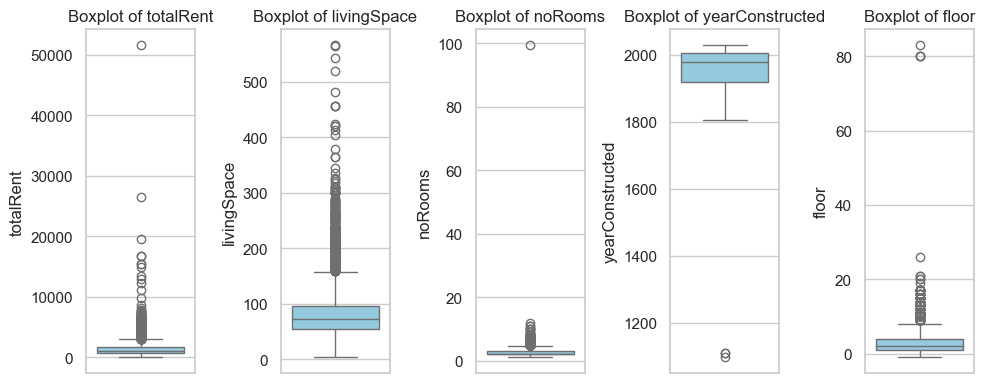

In [47]:
#Plot numerical columns in boxplots

plt.figure(figsize=(10, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df_berlin_s[col], color="skyblue")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

The boxplots show clearly that the dataset has some unrealistic values, particularly in *noRooms*, *yearConstructed*, and *floor*. I will remove these rows manually.

In [49]:
# Manual thresholds for cleaning unrealistic values

df_berlin_s = df_berlin_s[
    (df_berlin_s['noRooms'] >= 1) & (df_berlin_s['noRooms'] <= 20) &
    (df_berlin_s['floor'] >= 0) & (df_berlin_s['floor'] <= 40) &
    (df_berlin_s['yearConstructed'] >= 1820) & (df_berlin_s['yearConstructed'] <= 2025)
]

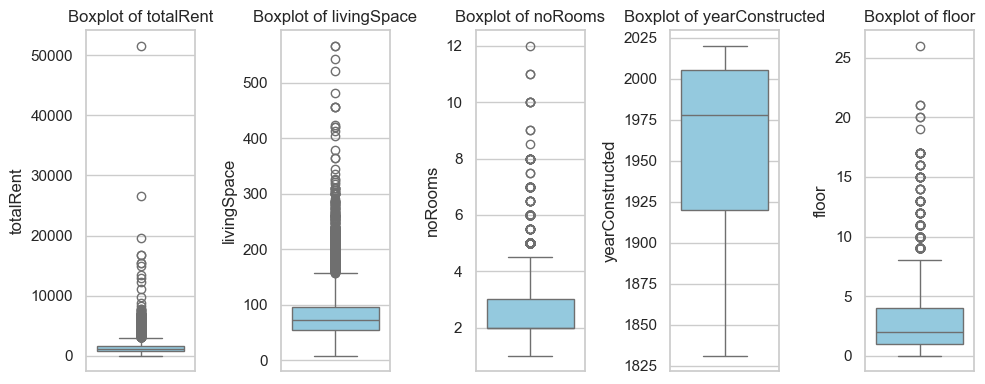

Shape: (9732, 15)


In [50]:
#Plot numerical columns in boxplots

plt.figure(figsize=(10, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df_berlin_s[col], color="skyblue")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()
print("Shape:", df_berlin_s.shape)

We didn't lose much of the data after manual filtering, but boxplots look more realistic now.

Remaining outliers likely represent valid cases rather than anomalies, but we can see that they are situated in much higher ranges than the normal distribution, particularly indicating larger living spaces, number of rooms, as well as significantly higher rent prices. Those are indications that such listings most likely belong to the premium segment of the rental property market and target non-typical tenants with a specific set of requirements. Because of that, I will filter these outliers into another subset and explore it separately.

To relate the listing to the premium segment, first, I will calculate the threshold based on rent using IQR.

In [53]:
# Calculate the threshold of the premium properties

Q1 = df_berlin_s['totalRent'].quantile(0.25)
Q3 = df_berlin_s['totalRent'].quantile(0.75)
IQR = Q3 - Q1
prem_threshold = Q3 + 1.5 * IQR

print(f"Premium threshold: €{prem_threshold:.2f}")

Premium threshold: €3026.92


Now I will create two subsets for the regular and premium categories. Along with the upper threshold, I will also set the lower threshold of 100 euros.

In [55]:
# Create two subsets

df_be_reg = df_berlin_s[(df_berlin_s['totalRent'] <= prem_threshold) & (df_berlin_s['totalRent'] > 100)].copy()
df_be_prem = df_berlin_s[df_berlin_s['totalRent'] > prem_threshold].copy()

print("Regular listings:", df_be_reg.shape)
print("Premium listings (outliers):", df_be_prem.shape)

Regular listings: (9271, 15)
Premium listings (outliers): (458, 15)


In further analysis, I will focus predominantly on regular listings.

### 3.3. EDA of regular listings

#### 3.3.1. Univariate Analysis

Intro + num vals

After dealing with outliers, I will continue exploring the features separately to understand the data better. As there are numerical values, as well as categorical object and boolean data types, I will focus on each one of them separately.

I will start with numerical values.

In [60]:
# Show descriptive statistics

df_be_reg.describe()

,totalRent,livingSpace,noRooms,yearConstructed,floor
count,9271.000000,9271.000000,9271.000000,9271.000000,9271.000000
mean,1229.227679,75.281100,2.440114,1967.500378,2.693776
std,581.512438,32.131215,0.983542,42.866914,2.148872
min,130.000000,8.000000,1.000000,1832.000000,0.000000
25%,779.000000,54.645000,2.000000,1925.000000,1.000000
50%,1083.000000,70.000000,2.000000,1978.000000,2.000000
75%,1567.415000,91.200000,3.000000,2000.000000,4.000000
max,3019.000000,310.000000,9.000000,2020.000000,26.000000


The average rent is 1228, but with a standard deviation of 582, the spread of prices is quite large. The average living space is 75 square meters, and the listings mostly contain the offers of 2 or 3 rooms. *yearConstructed* and *floor* represent discrete values (as *noRooms*) and tell us more about the buildings than the property.

Histograms will allow more in-depth exploration.

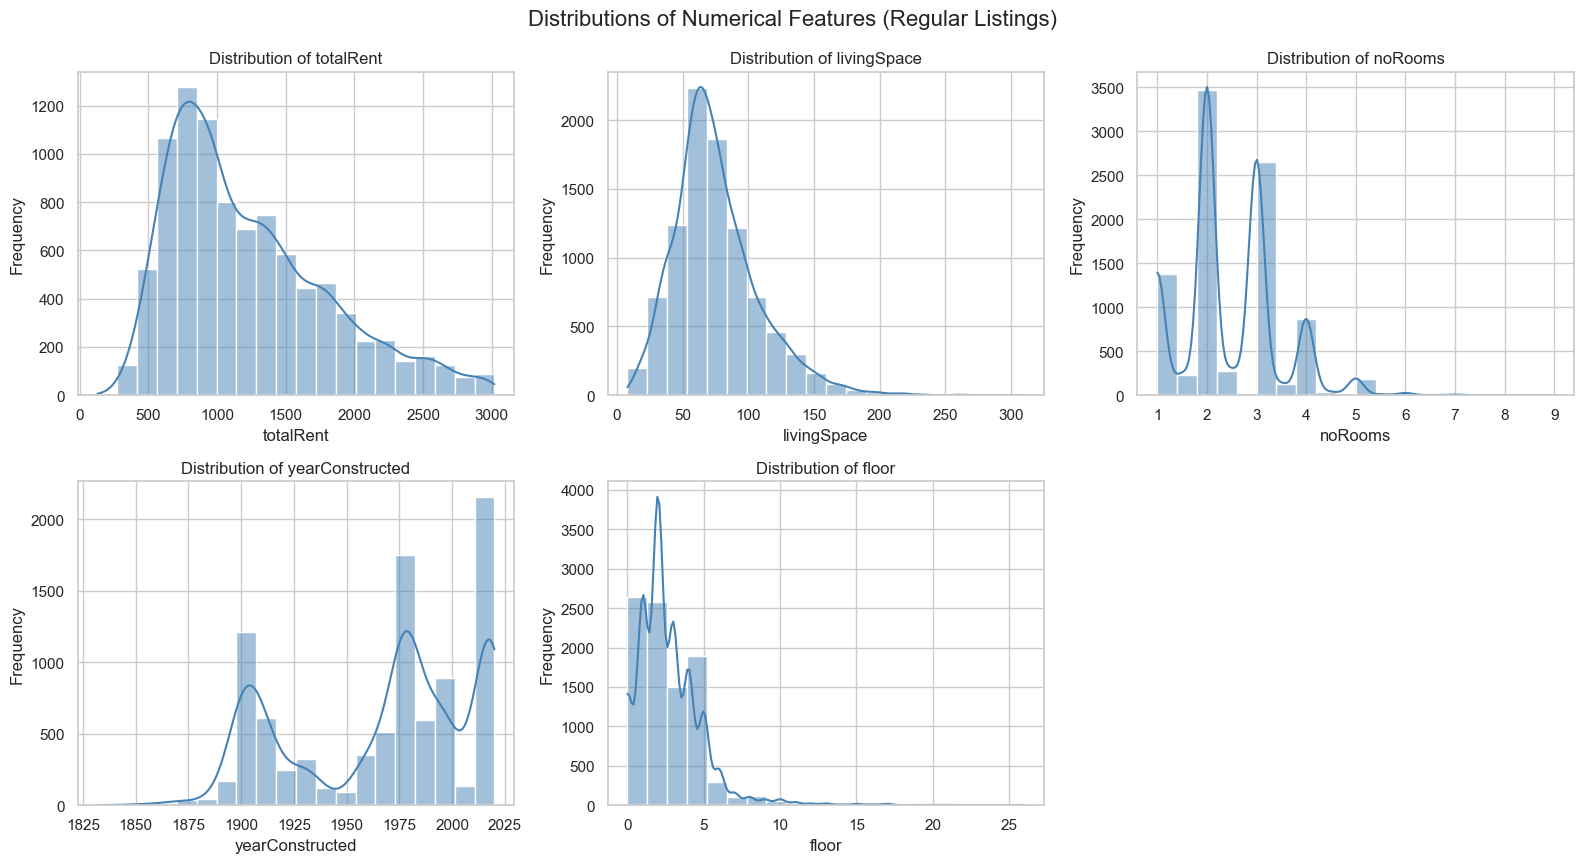

In [62]:
num_cols = df_be_reg.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_be_reg[col], kde=True, color='steelblue', bins=20)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.suptitle("Distributions of Numerical Features (Regular Listings)", fontsize=16, y=1.02)
plt.show()


The distribution of the rent is positively skewed, with a tail gradually spreading towards higher values. As we separated the regular and premium listings before, the maximum values will be a bit higher than 3000. Many prices are lying in the range of 700-1000 (IQR is between 779 and 1567).

The living space is also right-skewed, most of the listings ranging between 50 and 100 square meters (IQR: 55 - 91). Together with the rent, it looks like a typical situation for the property market where some objects will cost more and have a larger square.

As can be seen in the table above, there are many 2 and 3-room listings, and a significant number of one-room properties, with some having 4 rooms.

*yearConstructed* provides an interesting, almost historical perspective: many properties were built in the 1900s, then the number plunges in the 40's and early 50's (WW2), with a gradual rise afterwards and peaks in the late 70's and 80's and 2010s. Naturally, we focus on listings for rent, but further, we will explore this factor as well.

Looking at the distribution among the floors, one can see that most of the listings are on the floors from 0 to 4, which can be an indication of the height of the buildings in the city.

I will move to categorical values and start with features of the object data type. Also, I will temporary exclude the column *regio3* as it contains geographical data which will be explored later.

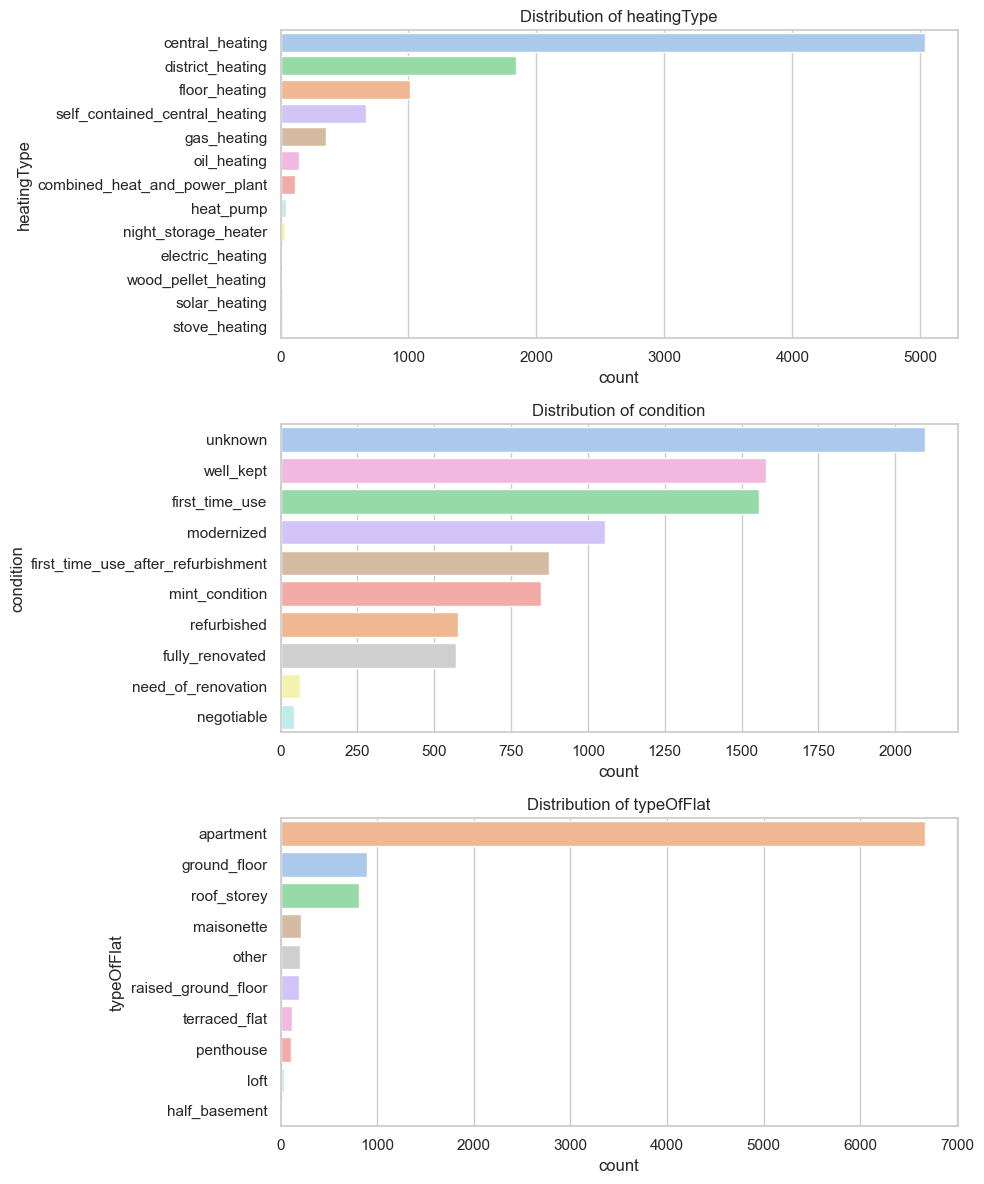

In [65]:
object_cols = df_be_reg.select_dtypes(include='object').drop(columns='regio3').columns

plt.figure(figsize=(10, len(object_cols)*4))
for i, col in enumerate(object_cols, 1):
    plt.subplot(len(object_cols), 1, i)
    sns.countplot(data=df_be_reg, y=col, order=df_be_reg[col].value_counts().index, hue=col, palette='pastel', legend=False)
    plt.xticks()
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

Most of the listed properties are connected to the central heating system, which numbers more than 5000. Still, there are significant numbers in the categories of district, floor, and self-contained central heating.

There is a large distribution of the properties according to their condition. Many of them are described as well-kept or even first-time use, and an insignificant number of in need of renovation or negotiable. *condition* is a potentially significant feature and can strongly influence the rent, also, there is no information about the condition of many properties.

The majority of listings are apartments. Some of the offers are on ground floors or roof storeys, and a much smaller number are spread among other categories.


The dataset has 6 categories of a boolean data type, which indicate the presence or absence of certain features, such as balcony, cellar, lift, garden, kitchen, and also mention if the building is newly constructed or not. 

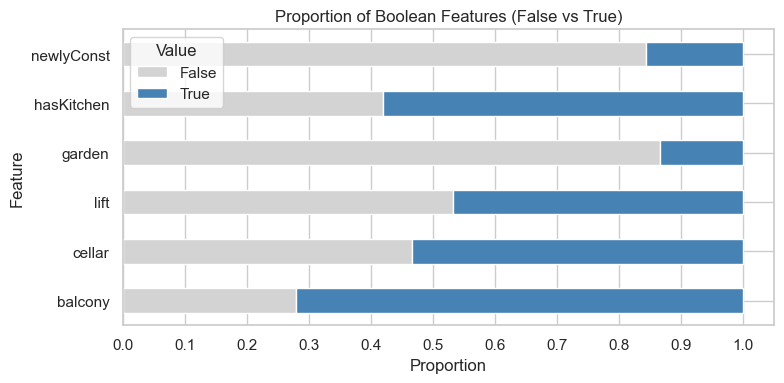

In [68]:
# Identify boolean columns in the dataframe
bool_cols = df_be_reg.select_dtypes(include='bool').columns
# Get proportions

bool_props = df_be_reg[bool_cols].apply(lambda col: col.value_counts(normalize=True)).T

# Plot
bool_props.plot(kind='barh', stacked=True, figsize=(8, 4), color=['lightgray', 'steelblue'])

plt.title('Proportion of Boolean Features (False vs True)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.legend(title='Value', labels=['False', 'True'], loc='upper left')
plt.tight_layout()
plt.show()


Just about 15% of the properties are in newly constructed buildings. Almost 60 percent of properties are equipped with a kitchen. More than 45% are located in buildings with an elevator, more than 70% have balconies, and more than half have cellars. The garden is mentioned in less than 15% of the cases.


#### 3.3.2. Multivariate Analysis

After analysing the features of the rental properties separately, in this section, I will look at the relations between them and the target variable of rent. I will follow a similar logic to that in the univariate analysis, starting with numerical features and later investigating the categorical ones.

For now, I left aside a feature of a zip code, which connects the data to geography. As it is a very important categorical feature, I will investigate its influence on the rent at the end of this section, after exploring all other relations.

To start with the numerical features, I will plot a correlation matrix.

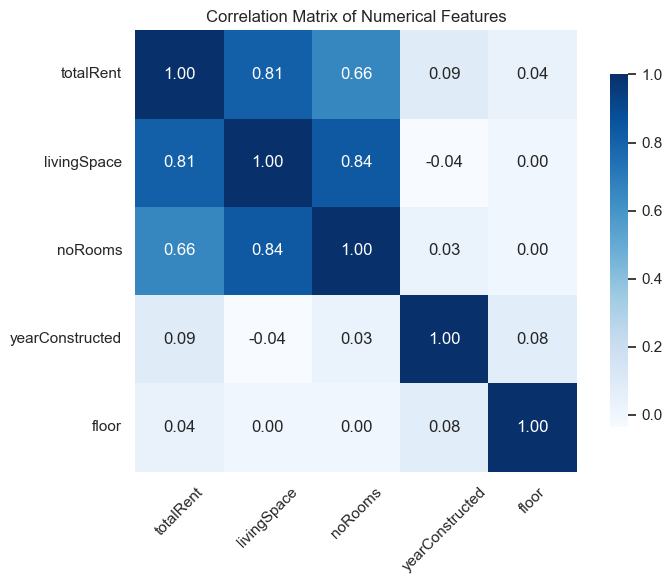

In [72]:
# Select only numeric columns from the DataFrame
nume_df_be_reg = df_be_reg.select_dtypes(include='number')

# Compute correlation matrix
corr = nume_df_be_reg.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


There is a strong positive correlation between rent and the square of living space, and a moderate positive correlation between rent and the number of rooms. At the same time, the year of construction and floor influence the rent just slightly (very weak positive correlation).

I will explore these two groups separately.

Understandably, the living space and number of rooms are the most important factors that shape the rent. Here are two scatterplots:

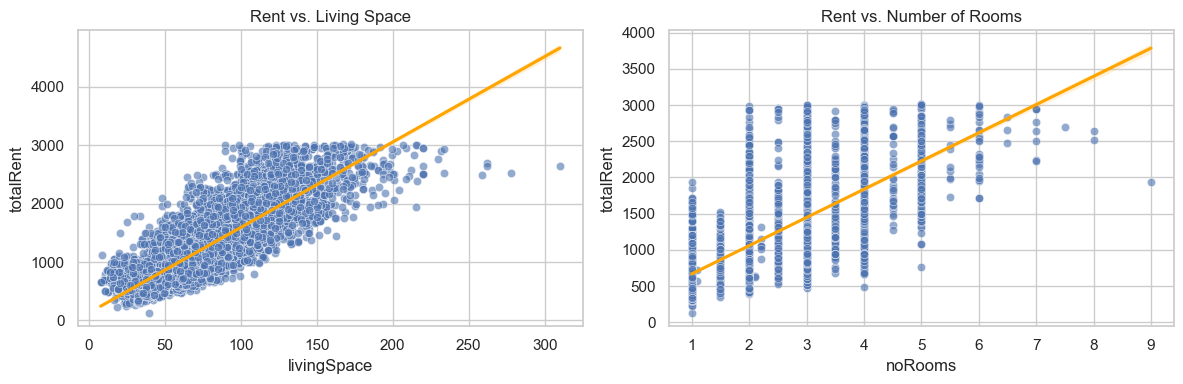

In [75]:
plt.figure(figsize=(12, 4))

# Rent vs. Living Space
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_be_reg, x='livingSpace', y='totalRent', alpha=0.6)
sns.regplot(data=df_be_reg, x='livingSpace', y='totalRent', scatter=False, ax=plt.gca(), color='orange')
plt.title('Rent vs. Living Space')

# Rent vs. Number of Rooms
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_be_reg, x='noRooms', y='totalRent', alpha=0.6)
sns.regplot(data=df_be_reg, x='noRooms', y='totalRent', scatter=False, ax=plt.gca(), color='orange')
plt.title('Rent vs. Number of Rooms')

plt.tight_layout()
plt.show()

On both of them, one can see the dependence of rent on the living space and the number of rooms. Still, as it was shown in histograms before, the spread is large on both plots, which illustrates that other factors influence the price of rent strongly.

Even if the *yearConstructed* and *floor* columns don't influence the rent so strongly, still, let's investigate them closer:

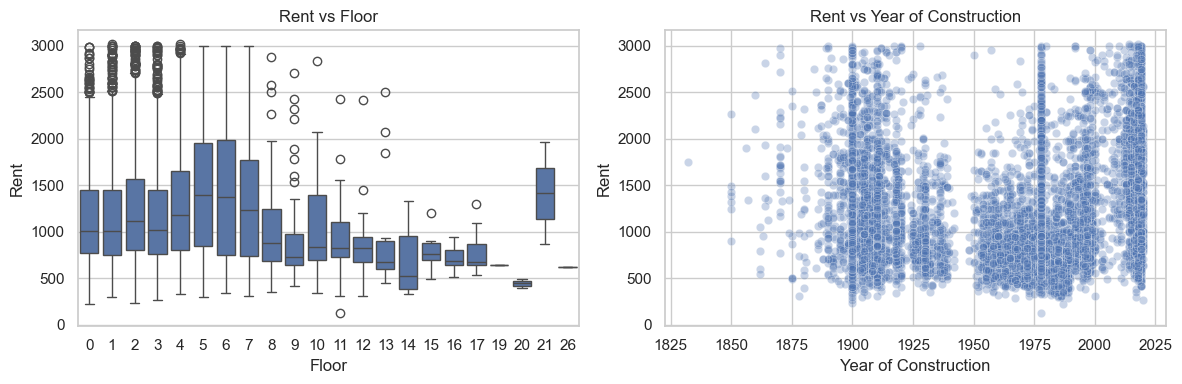

In [78]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot: Rent vs Floor
sns.boxplot(ax=axes[0], x='floor', y='totalRent', data=df_be_reg)
axes[0].set_title('Rent vs Floor')
axes[0].set_xlabel('Floor')
axes[0].set_ylabel('Rent')

# Scatterplot: Rent vs Year of Construction
sns.scatterplot(ax=axes[1], x='yearConstructed', y='totalRent', data=df_be_reg, alpha=0.3)
axes[1].set_title('Rent vs Year of Construction')
axes[1].set_xlabel('Year of Construction')
axes[1].set_ylabel('Rent')

plt.tight_layout()
plt.show()


As we saw in the histogram depicting the range of the floors over the dataset, almost all of the properties are on the floors from 0 to 4. At the boxplot to the left, we can also observe a significant number of outliers, with the rent climbing over 2500, but probably not as often as in the properties on 5 - 7 floors, which are not so many. The variance in the listings on the higher floors can also be because of the smaller number of offers.

Regarding the year of construction, there are properties below the rent range of 1500 in the buildings built in all years. Higher rents are more common for the buildings from the years 1900-1920, the late 70's - beginning of 80's, the late 90's, and the 2010s.

Next, I will explore the influence of categorical features on rent, and start with boxplots on the object data type.

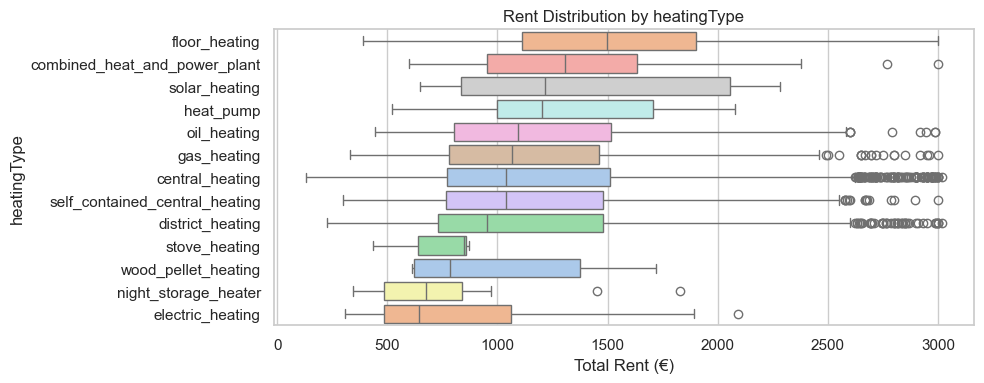

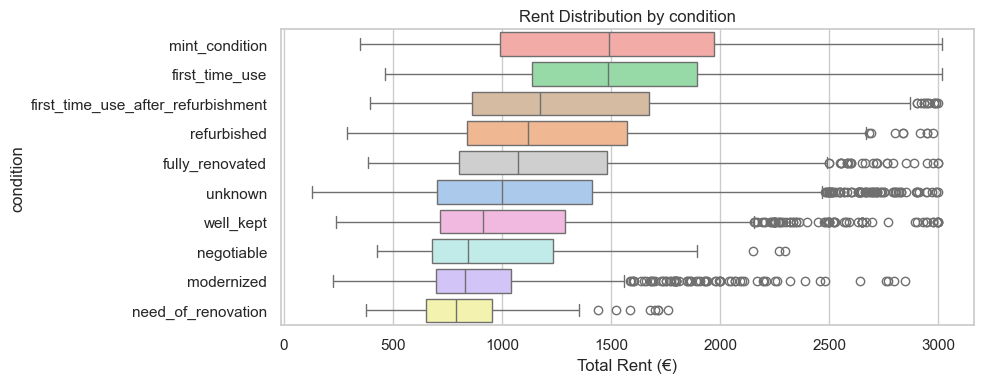

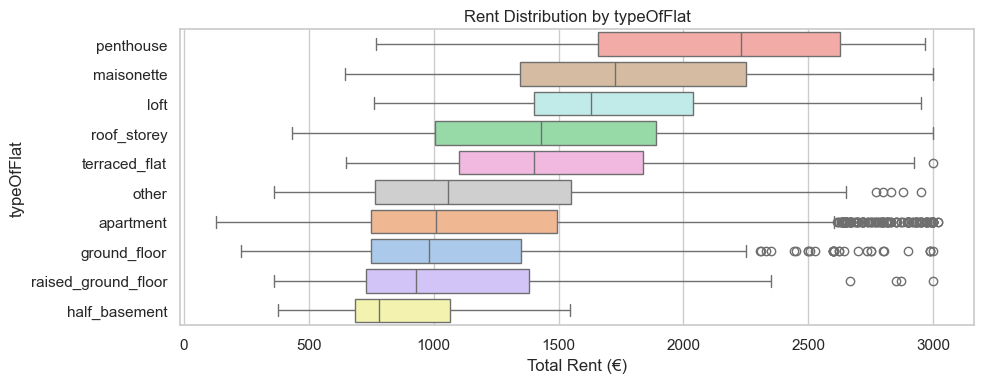

In [81]:
for col in object_cols:
    # Reorder categories by median rent
    order = df_be_reg.groupby(col)['totalRent'].median().sort_values(ascending=False).index

    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_be_reg, x='totalRent', y=col, order=order, palette='pastel',hue=col, legend=False, dodge=False)
    
    plt.title(f'Rent Distribution by {col}')
    plt.xlabel('Total Rent (€)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

As it was shown before, the majority of the listings are connected to the central heating, with many also having district, floor, and self-contained central heating. Fewer people use gas. Median rent for all of them is similar (±1100), as well as the range of distribution. The only exception is floor heating. The total median rent for such properties is almost 500 euros higher.

The rent distribution by condition is very clear: the rent gradually increases through the categories from *need_of_renovation* to *first_time_use_after_refurbishment* in the range of approx. 400 euros, and then rises by 300 euros more for categories of *first_time_use* and *mint_condition*.

With the vast majority of listings being apartments, this category, ground floor and raised ground floor, are in a similar rent range, with the median being about 1000 euros. Roof storeys and terraced flats cost significantly more, with a median rent between 1400 and 1500 euros. Many prices for lofts and maisonettes reach well above 1500, and penthouses have a median rent of approximately 2250. For the last three types of flats, it is important to keep in mind that category-wise, they may be more related to the premium segment of the market, which was filtered out into a separate subset by prices.

Finally, I will explore the binary features. Here are the box plots for each of them:

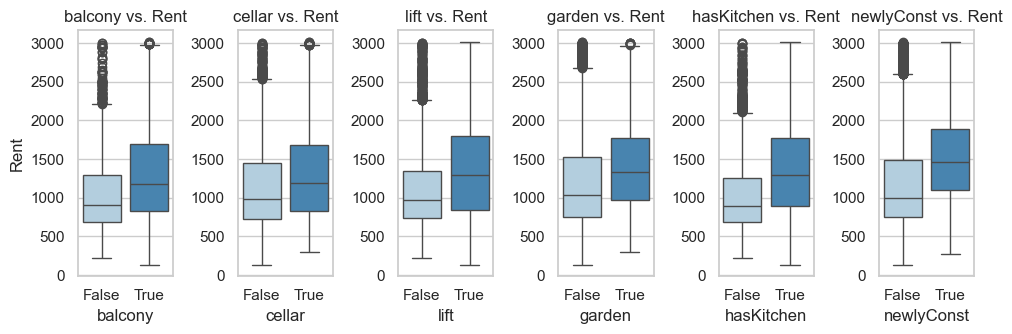

In [84]:
plt.figure(figsize=(10, 3.5))
bool_cols = df_be_reg.select_dtypes(include='bool').columns

# Iterate over boolean columns and plot side by side
for i, col in enumerate(bool_cols, 1):
    plt.subplot(1, 6, i)
    sns.boxplot(data=df_be_reg, x=col, y='totalRent', palette='Blues', hue=col, legend=False)
    plt.title(f'{col} vs. Rent')
    plt.xlabel(col)
    if i == 1:
        plt.ylabel('Rent')
    else:
        plt.ylabel('')
    
plt.tight_layout()
plt.show()

One can see the positive correlation between the presence of each of these features and the rent price. Still, the influence differs. Flats with a cellar cost more than those without one, but flats in the newly constructed buildings have significantly higher rents.

To zoom in on it, I will have a look at the barplots of mean rent according to each feature:

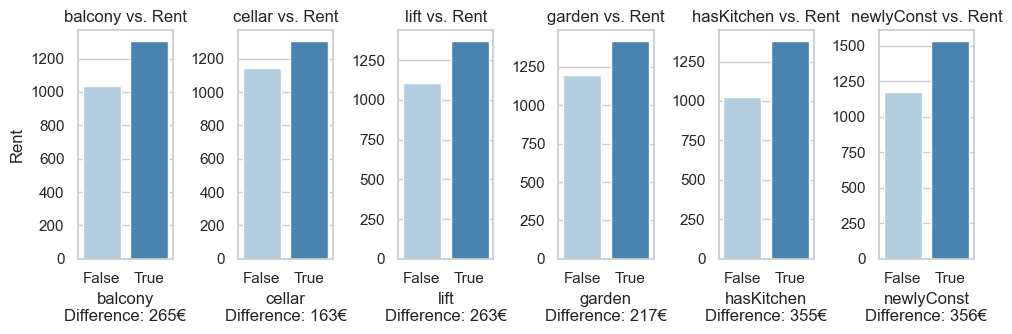

In [86]:

plt.figure(figsize=(10, 3.5))

# Loop over boolean columns
for i, col in enumerate(bool_cols, 1):
    avg_rent = df_be_reg.groupby([col])['totalRent'].mean().reset_index()
    
    plt.subplot(1, len(bool_cols), i)  # Create a subplot for each boolean column
    sns.barplot(data=avg_rent, x=col, y='totalRent', hue=col, palette='Blues', legend = False)
    plt.title(f'{col} vs. Rent')
    
    mean_rent = df_be_reg.groupby([col])['totalRent'].mean().reset_index()
    rent_diff = mean_rent.loc[mean_rent[col] == True, 'totalRent'].values[0] - \
                mean_rent.loc[mean_rent[col] == False, 'totalRent'].values[0]
    
    plt.xlabel(f'{col}\nDifference: {rent_diff:.0f}€')
    if i == 1:
        plt.ylabel('Rent')
    else:
        plt.ylabel('')
    
plt.tight_layout()
plt.show()


These features affect rent in different ways, but in general, there's a clear trend: when a flat has one of these characteristics, the rent tends to be higher. For example, the average rent for a flat with a balcony is about €265 more than for one without. The difference is even bigger for flats with a fitted kitchen or those in a new building.

At the same time, these features don't work on their own. The box plots show that the rent ranges for True and False values overlap a lot, which means other factors—like location, size, or building type—also influence the rent.

#### 3.3.3 Mapping with Folium and GeoPandas

Geographic location is one of the most important criteria that influences the rent price. At the beginning of this analysis, I filtered the original dataset on the feature *regio1*, selecting Berlin. To zoom in on the districts and neighborhoods of the city, the dataset provides several more feature, such as postal code, street, as well as merged neighborhood-district column *regio3*:

In [90]:
# List unique values in 'regio3'

df_be_reg['regio3'].unique()

array(['Staaken_Spandau', 'Weißensee_Weißensee', 'Mitte_Mitte',
       'Kreuzberg_Kreuzberg', 'Tiergarten_Tiergarten', 'Grünau_Köpenick',
       'Marzahn_Marzahn', 'Neu_Hohenschönhausen_Hohenschönhausen',
       'Hellersdorf_Hellersdorf', 'Prenzlauer_Berg_Prenzlauer_Berg',
       'Französisch_Buchholz_Pankow', 'Charlottenburg_Charlottenburg',
       'Mariendorf_Tempelhof', 'Neukölln_Neukölln',
       'Schmargendorf_Wilmersdorf', 'Wedding_Wedding',
       'Köpenick_Köpenick', 'Siemensstadt_Spandau', 'Britz_Neukölln',
       'Buch_Pankow', 'Friedrichshain_Friedrichshain', 'Karow_Weißensee',
       'Wilmersdorf_Wilmersdorf', 'Reinickendorf_Reinickendorf',
       'Schmöckwitz_Köpenick', 'Wittenau_Reinickendorf',
       'Spandau_Spandau', 'Adlershof_Treptow', 'Friedenau_Schöneberg',
       'Alt_Hohenschönhausen_Hohenschönhausen', 'Schöneberg_Schöneberg',
       'Friedrichsfelde_Lichtenberg', 'Karlshorst_Lichtenberg',
       'Oberschöneweide_Köpenick', 'Pankow_Pankow',
       'Johannisthal_T

The pairs in this column are two different categories: neighborhood (Ortsteil) and district (Bezirk). They are not separated consistently. Also, after some research, I concluded that the names of both categories are mentioned in the old format, which was in use before the administrative reform of 2001, which changed the names of some districts and neighborhoods, and sometimes changed their borders.

As my goal is to analyse the geography of the listings and influence of the location on *totalRent*, I will map the listings according to the districts and use modern names and borders.

For mapping, I will use a public geojson file from https://daten.odis-berlin.de/de/dataset/bezirksgrenzen/

In [92]:
# Explore the geojson file for Berlin districts (Bezirke)

geojson_path_1 = '/Users/alex/Documents/Work/Projects for portfolio/bezirksgrenzen.geojson'
gdf_bez = gpd.read_file(geojson_path_1)
gdf_bez.head()

,gml_id,Gemeinde_name,Gemeinde_schluessel,Land_name,Land_schluessel,Schluessel_gesamt,geometry
0,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,"MULTIPOLYGON (((13.32074 52.6266, 13.32045 52...."
1,s_wfs_alkis_bezirk.F176__2,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,"MULTIPOLYGON (((13.32111 52.52446, 13.32103 52..."
2,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,"MULTIPOLYGON (((13.57925 52.39083, 13.57958 52..."
3,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,"MULTIPOLYGON (((13.50481 52.6196, 13.50467 52...."
4,s_wfs_alkis_bezirk.F176__5,Neukölln,008,Berlin,11,11000008,"MULTIPOLYGON (((13.45832 52.48569, 13.45823 52..."


Column *Gemeinde_name* provides today's names of the districts.

To match the names in my dataset to the geographic data, first, I will create a reference map that will match the former district names from *regio3* to the modern ones. Most of the old districts were united into bigger ones.

In [94]:
# Create a reference dictionary

bezirk_map = {
    'Mitte': 'Mitte',
    'Tiergarten': 'Mitte',
    'Wedding': 'Mitte',
    'Friedrichshain': 'Friedrichshain-Kreuzberg',
    'Kreuzberg': 'Friedrichshain-Kreuzberg',
    'Pankow': 'Pankow',
    'Weißensee': 'Pankow',
    'Prenzlauer Berg': 'Pankow',
    'Charlottenburg': 'Charlottenburg-Wilmersdorf',
    'Wilmersdorf': 'Charlottenburg-Wilmersdorf',
    'Spandau': 'Spandau',
    'Steglitz': 'Steglitz-Zehlendorf',
    'Zehlendorf': 'Steglitz-Zehlendorf',
    'Tempelhof': 'Tempelhof-Schöneberg',
    'Schöneberg': 'Tempelhof-Schöneberg',
    'Neukölln': 'Neukölln',
    'Treptow': 'Treptow-Köpenick',
    'Köpenick': 'Treptow-Köpenick',
    'Marzahn': 'Marzahn-Hellersdorf',
    'Hellersdorf': 'Marzahn-Hellersdorf',
    'Lichtenberg': 'Lichtenberg',
    'Hohenschönhausen': 'Lichtenberg',
    'Reinickendorf': 'Reinickendorf'
}


In [95]:
# Replace "_" with " " in column regio3

df_be_reg['regio3']=df_be_reg['regio3'].str.replace('_', ' ')
df_be_reg['regio3'].head()

45          Staaken Spandau
61      Weißensee Weißensee
77              Mitte Mitte
86      Kreuzberg Kreuzberg
87    Tiergarten Tiergarten
Name: regio3, dtype: object

In [96]:
# Map values from 'regio3' to the 'Districts' column
df_be_reg['Districts'] = None
for index, row in df_be_reg.iterrows():
    for key, value in bezirk_map.items():
        if key in row['regio3']:
            df_be_reg.at[index, 'Districts'] = value
            break

In [97]:
df_be_reg[['regio3', 'Districts',]].head()

,regio3,Districts
45,Staaken Spandau,Spandau
61,Weißensee Weißensee,Pankow
77,Mitte Mitte,Mitte
86,Kreuzberg Kreuzberg,Friedrichshain-Kreuzberg
87,Tiergarten Tiergarten,Mitte


A new feature, *Districts*, is created.

Earlier, we have seen that *totalRent* is significantly influenced by many factors, especially living space and the number of rooms in the flat. To ensure that the rent prices are compared with additional bias and adhere to the standards of the property market, I will create an additional feature *rentM2* -- rent per square meter.

In [99]:
# Create a Rent per square meter feature
df_be_reg = df_be_reg[df_be_reg['livingSpace'] > 0]
df_be_reg['rentM2'] = df_be_reg['totalRent'] / df_be_reg['livingSpace']

# Create a dataframe of the mean of rent per square  meter grouped by location name
df_rent_m2 = df_be_reg.groupby('Districts', as_index=False)['rentM2'].mean()
df_rent_m2.head()

,Districts,rentM2
0,Charlottenburg-Wilmersdorf,18.673643
1,Friedrichshain-Kreuzberg,19.818425
2,Lichtenberg,14.278137
3,Marzahn-Hellersdorf,11.779457
4,Mitte,21.874482


To check the proposition per district, I will create a feature *num_listings* that will show the number of listings per district.

In [101]:
# Count the number of listings per location
plz_listing_counts = df_be_reg.groupby('Districts').size().reset_index(name='num_listings')

# Show the resulting dataframe
plz_listing_counts

,Districts,num_listings
0,Charlottenburg-Wilmersdorf,984
1,Friedrichshain-Kreuzberg,770
2,Lichtenberg,539
3,Marzahn-Hellersdorf,555
4,Mitte,1716
5,Neukölln,483
6,Pankow,987
7,Reinickendorf,495
8,Spandau,571
9,Steglitz-Zehlendorf,582


Before plotting a map I merge the created features with geographical data.

In [103]:
# Check that matching values are strings
gdf_bez['Gemeinde_name'] = gdf_bez['Gemeinde_name'].astype(str)
df_rent_m2['Districts'] = df_rent_m2['Districts'].astype(str)
plz_listing_counts['Districts'] = plz_listing_counts['Districts'].astype(str)

# Merge rent per m² data
berlin_gdf = gdf_bez.merge(df_rent_m2, left_on='Gemeinde_name', right_on='Districts', how='left')

# Merge listing count data
berlin_gdf = berlin_gdf.merge(plz_listing_counts, left_on='Gemeinde_name', right_on='Districts', how='left')

# Clean up redundant columns from merges
berlin_gdf = berlin_gdf.drop(columns=['Districts_x', 'Districts_y'], errors='ignore')

# Project the shapeline
berlin_gdf = berlin_gdf.to_crs(epsg=4326)

Now, I will plot a folium map that, along with geographical visualization, provides the modern district, number of offers, and average (mean) rent per square meter per district.

In [105]:
# Create the base map centered on Berlin
m = folium.Map(location=[52.52, 13.405], zoom_start=10)

# Define style function for the polygons
style_function = lambda feature: {
    'fillColor': 'brown',
    'color': 'black',
    'weight': 1,
    'fillOpacity': 0.2,
    'opacity': 1
}

# Highlight function for hover effect
highlight_function = lambda x: {
    'weight': 1,
    'color': 'brown',
    'fillOpacity': 0.5
}

# Create and add the GeoJSON layer with tooltips
geojson_layer = folium.GeoJson(
    berlin_gdf,
    name='geojson',
    tooltip=folium.GeoJsonTooltip(
        fields=['Gemeinde_name', 'rentM2', 'num_listings'],  # Add rentM2 to the fields
        aliases=['District:', 'Average Rent per m² (€):', 'Number of Listings:'],  # Alias for the rentM2 field
        localize=True,
        sticky=False,
        labels=True
    ),
    style_function=style_function,
    highlight_function=highlight_function
).add_to(m)

# Show the map
m



Exploring the map, one can see that the rent prices and offers differ significantly across the districts of Berlin. Naturally, rent in central districts is more expensive than in more peripheral areas. For instance, average rent per square meter in Marzahn-Hellersdorf is almost twice as cheap as in Mitte, also the number of listings is three times smaller.

I will continue to explore the relationship between rent and other features grouped by the district. Next, I will compare an average rent per square meter and an average living space.

In [108]:
# Merge Living space and rent data for plotting

living_space = df_be_reg.groupby('Districts')['livingSpace'].mean().reset_index()
berlin_gdf_st = berlin_gdf.merge(living_space, left_on='Gemeinde_name', right_on='Districts', how='left')
berlin_gdf_st = berlin_gdf_st.merge(df_rent_m2, left_on='Gemeinde_name', right_on='Districts', how='left')

berlin_gdf_st = berlin_gdf_st.drop(columns=['Districts_x', 'Districts_y', 'rentM2_y'], errors='ignore')
berlin_gdf_st = berlin_gdf_st.rename(columns={'rentM2_x': 'rentM2'})

berlin_gdf_st.columns

Index(['gml_id', 'Gemeinde_name', 'Gemeinde_schluessel', 'Land_name',
       'Land_schluessel', 'Schluessel_gesamt', 'geometry', 'rentM2',
       'num_listings', 'livingSpace'],
      dtype='object')

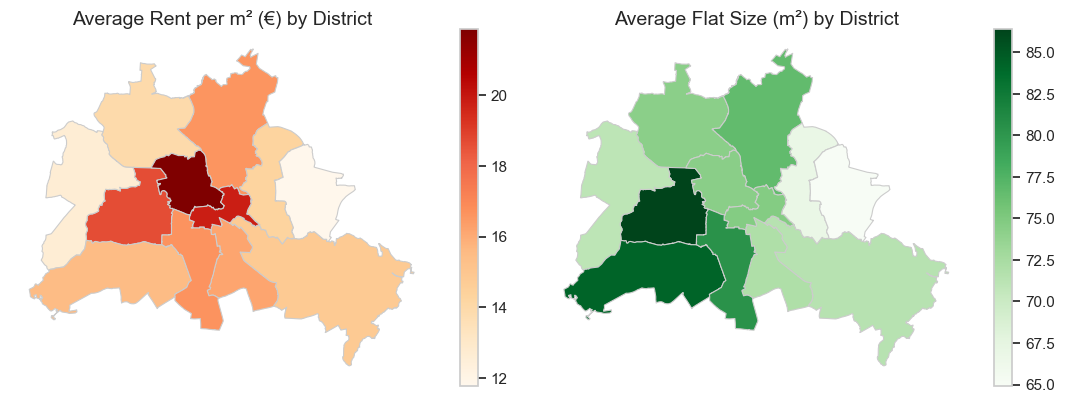

In [109]:
# Plot the figure

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Plot rent per m²
berlin_gdf_st.plot(
    column='rentM2',
    cmap='OrRd',
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.8',
    legend=True
)
axes[0].set_title('Average Rent per m² (€) by District', fontsize=14)
axes[0].axis('off')

# Plot living space
berlin_gdf_st.plot(
    column='livingSpace',
    cmap='Greens',
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.8',
    legend=True
)
axes[1].set_title('Average Flat Size (m²) by District', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


We already saw the difference in rent between Mitte and Marzahn-Hellersdorf. The choropleth map on the right shows that flats in Marzahn-Hellersdorf are not only the cheapest on average, but also the smallest in Berlin. Interestingly, the average living space in Mitte is not particularly large compared to its price, which suggests that other factors — such as location — play a major role in rent levels.

Charlottenburg-Wilmersdorf has the third-highest rent per square meter in the city, and at the same time, the average living space there is the largest. This points toward a higher overall rent per flat. In contrast, rent is significantly lower in neighboring Steglitz-Zehlendorf, even though flats there have the second-largest average living space among all districts.

After exploring the relations between the rent, living space, and locations, I would like to investigate the city landscape by plotting maps of the average year of construction and average floor in the listings by district. For the year of construction, I will calculate the median, which will allow me to reduce the influence of outliers. As for the floor, for mapping, I will calculate the mean, as it will allow tracking more subtle variations.

In [112]:
# Merge the average year of construction and average floor for plotting

contst_year = df_be_reg.groupby('Districts')['yearConstructed'].median().reset_index()
berlin_gdf_st = berlin_gdf.merge(contst_year, left_on='Gemeinde_name', right_on='Districts', how='left')

floor_avg = df_be_reg.groupby('Districts')['floor'].mean().reset_index()
berlin_gdf_st = berlin_gdf_st.merge(floor_avg, left_on='Gemeinde_name', right_on='Districts', how='left')

berlin_gdf_st = berlin_gdf_st.drop(columns=['Districts_x', 'Districts_y'], errors='ignore')

berlin_gdf_st.columns

Index(['gml_id', 'Gemeinde_name', 'Gemeinde_schluessel', 'Land_name',
       'Land_schluessel', 'Schluessel_gesamt', 'geometry', 'rentM2',
       'num_listings', 'yearConstructed', 'floor'],
      dtype='object')

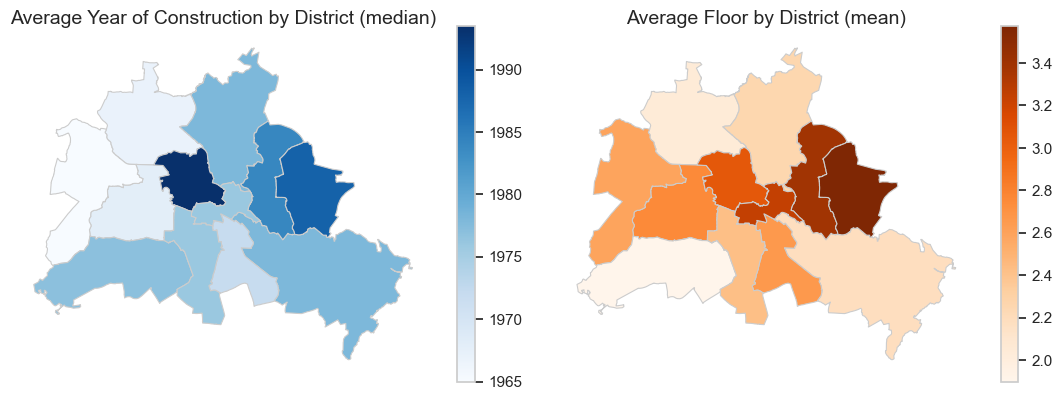

In [113]:
# Plot the figure

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Plot the average year of construction
berlin_gdf_st.plot(
    column='yearConstructed',
    cmap='Blues',
    linewidth=0.8,
    ax=axes[0],
    edgecolor='0.8',
    legend=True
)
axes[0].set_title('Average Year of Construction by District (median)', fontsize=14)
axes[0].axis('off')

# Plot the average floor
berlin_gdf_st.plot(
    column='floor',
    cmap='Oranges',
    linewidth=0.8,
    ax=axes[1],
    edgecolor='0.8',
    legend=True
)
axes[1].set_title('Average Floor by District (mean)', fontsize=14)
axes[1].axis('off')

plt.tight_layout()
plt.show()


What one can see on the left is the contrast between Mitte and other districts. Many flats in Mitte have been built in recent decades. This may be linked to Berlin’s 20th-century history as a city divided by the Wall, which significantly shaped its urban development. This observation also supports the idea that rent levels are influenced by more than just flat size — property age appears to be another important factor.

While apartment buildings are not very tall on average, they tend to be significantly taller in Lichtenberg and Marzahn-Hellersdorf. Combining this with earlier insights, we can say that flats in Marzahn-Hellersdorf are typically located in high-rise buildings constructed in the late 1980s. These apartments tend to have relatively small living spaces and lower rents.

### 4. Summary.

The first part of this project was focused on preparing and understanding the dataset. I cleaned and reshaped the data, handled outliers, and took a closer look at both numerical and categorical features. Then, I explored how they relate to the total rent, which is the main target of the analysis.

Rent in Berlin is influenced by many factors. The key ones are the living space, the number of rooms, and the location. Prices also vary depending on the type of flat, condition, and equipment, such as a kitchen or balcony, among other features.

Next, I will turn to a Tableau dashboard to present these findings and explore them in more detail. In the third part, I will return to Jupyter to build predictive models.

In [117]:
# Adding a zipcode column to the cleaned data for further analysis

df_be_reg['geo_plz'] = df_berlin.loc[df_be_reg.index, 'geo_plz']
df_be_reg.head()

,totalRent,livingSpace,noRooms,yearConstructed,heatingType,condition,typeOfFlat,balcony,cellar,lift,garden,hasKitchen,newlyConst,floor,regio3,Districts,rentM2,geo_plz
45,1140.00,77.00,3.0,1978,central_heating,unknown,ground_floor,True,False,True,False,True,False,0,Staaken Spandau,Spandau,14.805195,13591
61,955.00,62.63,2.0,1918,central_heating,refurbished,ground_floor,False,False,False,False,False,False,0,Weißensee Weißensee,Pankow,15.248284,13086
77,1300.00,46.40,2.0,2019,floor_heating,first_time_use,apartment,True,True,True,False,True,True,3,Mitte Mitte,Mitte,28.017241,10179
86,1428.78,67.00,2.5,2017,floor_heating,mint_condition,apartment,True,True,True,False,True,False,6,Kreuzberg Kreuzberg,Friedrichshain-Kreuzberg,21.325075,10963
87,1559.05,73.54,2.0,2019,district_heating,first_time_use,ground_floor,True,True,True,False,True,True,0,Tiergarten Tiergarten,Mitte,21.200027,10557


In [118]:
# Exporting the data

df_be_reg.to_csv("/Users/alex/Documents/Work/Projects for portfolio/df_be_reg.csv", index=False)
berlin_gdf_st.to_file("/Users/alex/Documents/Work/Projects for portfolio/berlin_gdf_st.geojson", driver='GeoJSON')



In [119]:
df_be_reg['heatingType'].unique()

array(['central_heating', 'floor_heating', 'district_heating',
       'combined_heat_and_power_plant', 'self_contained_central_heating',
       'gas_heating', 'oil_heating', 'solar_heating',
       'night_storage_heater', 'heat_pump', 'wood_pellet_heating',
       'electric_heating', 'stove_heating'], dtype=object)